# Formula 1 Data Science Project - Module 1
## Data Gathering, Cleaning, and Exploratory Data Analysis

This notebook covers the initial data collection and preparation for analyzing Formula 1 racing data using the FastF1 API.

## 1. Setup and Installation

First, we'll install and import the necessary libraries.

In [ ]:

# !pip install fastf1 pandas numpy matplotlib seaborn plotly scikit-learn

In [5]:
# Import libraries
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Enable FastF1 cache for faster data loading
fastf1.Cache.enable_cache('cache')

print("Libraries imported successfully!")
print(f"FastF1 version: {fastf1.__version__}")

Libraries imported successfully!
FastF1 version: 3.7.0


## 2. Data Gathering Using FastF1 API

### 2.1 Understanding the FastF1 API

FastF1 is a Python package that provides access to Formula 1 timing data and telemetry. It retrieves data from the official F1 live timing service.

**API Endpoints:**
- Session data: `fastf1.get_session(year, race, session_type)`
- Lap data: `session.laps`
- Telemetry data: `lap.get_telemetry()`
- Weather data: `session.weather_data`

**Example API Call:**
```python
session = fastf1.get_session(2024, 'Monaco', 'R')
session.load()
```

### 2.2 Gathering Race Session Data

In [32]:
# Load 2024 season data for multiple races
# We'll gather data from several races to have sufficient data for analysis

races_to_analyze = [
    ('Bahrain', 'R'),
    ('Saudi Arabia', 'R'),
    ('Australia', 'R'),
    ('Japan', 'R'),
    ('Monaco', 'R')
]

year = 2024
all_race_data = []

print("Gathering race data from FastF1 API...\n")

for race_name, session_type in races_to_analyze:
    try:
        print(f"Loading {race_name} Grand Prix...")
        session = fastf1.get_session(year, race_name, session_type)
        session.load()
        
        # Get lap data
        laps = session.laps
        laps['RaceName'] = race_name
        all_race_data.append(laps)
        
        print(f"  Loaded {len(laps)} laps from {race_name}")
    except Exception as e:
        print(f"   Error loading {race_name}: {str(e)}")

# Combine all race data
df_raw = pd.concat(all_race_data, ignore_index=True)


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Gathering race data from FastF1 API...

Loading Bahrain Grand Prix...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


  Loaded 1129 laps from Bahrain
Loading Saudi Arabia Grand Prix...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


  Loaded 901 laps from Saudi Arabia
Loading Australia Grand Prix...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


  Loaded 998 laps from Australia
Loading Japan Grand Prix...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


  Loaded 907 laps from Japan
Loading Monaco Grand Prix...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


  Loaded 1237 laps from Monaco


### 2.3 Display Raw Data Sample

In [33]:
# Display first few rows of raw data
print("RAW DATA SAMPLE:")
df_raw.head(10)

RAW DATA SAMPLE:


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,RaceName
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False,Bahrain
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,Red Bull Racing,0 days 01:01:37.489000,2024-03-02 15:05:19.920,1,1.0,False,,False,True,Bahrain
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,Red Bull Racing,0 days 01:03:13.785000,2024-03-02 15:06:56.216,1,1.0,False,,False,True,Bahrain
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,Red Bull Racing,0 days 01:04:50.538000,2024-03-02 15:08:32.969,1,1.0,False,,False,True,Bahrain
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,Red Bull Racing,0 days 01:06:27.185000,2024-03-02 15:10:09.616,1,1.0,False,,False,True,Bahrain
5,0 days 01:09:41.450000,VER,1,0 days 00:01:37.092000,6.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.187000,...,Red Bull Racing,0 days 01:08:04.358000,2024-03-02 15:11:46.789,1,1.0,False,,False,True,Bahrain
6,0 days 01:11:18.488000,VER,1,0 days 00:01:37.038000,7.0,1.0,NaT,NaT,0 days 00:00:31.015000,0 days 00:00:42.118000,...,Red Bull Racing,0 days 01:09:41.450000,2024-03-02 15:13:23.881,1,1.0,False,,False,True,Bahrain
7,0 days 01:12:55.512000,VER,1,0 days 00:01:37.024000,8.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.077000,...,Red Bull Racing,0 days 01:11:18.488000,2024-03-02 15:15:00.919,1,1.0,False,,False,True,Bahrain
8,0 days 01:14:32.741000,VER,1,0 days 00:01:37.229000,9.0,1.0,NaT,NaT,0 days 00:00:31.100000,0 days 00:00:42.166000,...,Red Bull Racing,0 days 01:12:55.512000,2024-03-02 15:16:37.943,1,1.0,False,,False,True,Bahrain
9,0 days 01:16:09.701000,VER,1,0 days 00:01:36.960000,10.0,1.0,NaT,NaT,0 days 00:00:30.986000,0 days 00:00:42.009000,...,Red Bull Racing,0 days 01:14:32.741000,2024-03-02 15:18:15.172,12,1.0,False,,False,True,Bahrain


In [34]:
# Display data types and info
print("\nRAW DATA INFORMATION:")
df_raw.info()


RAW DATA INFORMATION:
<class 'fastf1.core.Laps'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                5172 non-null   timedelta64[ns]
 1   Driver              5172 non-null   object         
 2   DriverNumber        5172 non-null   object         
 3   LapTime             5097 non-null   timedelta64[ns]
 4   LapNumber           5172 non-null   float64        
 5   Stint               5172 non-null   float64        
 6   PitOutTime          176 non-null    timedelta64[ns]
 7   PitInTime           178 non-null    timedelta64[ns]
 8   Sector1Time         5043 non-null   timedelta64[ns]
 9   Sector2Time         5162 non-null   timedelta64[ns]
 10  Sector3Time         5141 non-null   timedelta64[ns]
 11  Sector1SessionTime  5032 non-null   timedelta64[ns]
 12  Sector2SessionTime  5162 non-null   timedelta64[ns]
 13  Sector3SessionTime  5

In [35]:
# Check for missing values in raw data
print("\nMISSING VALUES IN RAW DATA:")
missing_values = df_raw.isnull().sum()
missing_percent = (missing_values / len(df_raw)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)


MISSING VALUES IN RAW DATA:
                Column  Missing Count  Percentage
6           PitOutTime           4996   96.597061
7            PitInTime           4994   96.558391
14             SpeedI1           1015   19.624903
17             SpeedST            296    5.723125
16             SpeedFL            188    3.634957
11  Sector1SessionTime            140    2.706883
8          Sector1Time            129    2.494200
3              LapTime             75    1.450116
13  Sector3SessionTime             31    0.599381
10         Sector3Time             31    0.599381
9          Sector2Time             10    0.193349
12  Sector2SessionTime             10    0.193349
15             SpeedI2             10    0.193349
26            Position              9    0.174014
18      IsPersonalBest              3    0.058005
24        LapStartDate              3    0.058005
28       DeletedReason              3    0.058005


### 2.4 Save Raw Data

In [10]:
# Save raw data to CSV
df_raw.to_csv('f1_race_data_raw.csv', index=False)
print("Raw data saved to: f1_race_data_raw.csv")

Raw data saved to: f1_race_data_raw.csv


## 3. Data Cleaning and Preparation

### 3.1 Handle Missing Values

In [36]:
# Create a copy for cleaning
df_clean = df_raw.copy()

print("Data Cleaning Process")
print(f"Initial shape: {df_clean.shape}")

# Remove rows where critical lap time data is missing
print("\n1. Removing rows with missing lap times...")
df_clean = df_clean.dropna(subset=['LapTime'])
print(f"   Shape after removing null lap times: {df_clean.shape}")

# Remove outlier laps (pit stops, safety car periods)
print("\n2. Removing outlier laps (likely pit stops or anomalies)...")
# Convert LapTime to seconds for easier filtering
df_clean['LapTimeSeconds'] = df_clean['LapTime'].dt.total_seconds()
# Remove extremely slow laps (>200 seconds, likely pit stops)
df_clean = df_clean[df_clean['LapTimeSeconds'] < 200]
print(f"   Shape after removing outliers: {df_clean.shape}")

# Handle missing sector times
print("\n3. Handling missing sector times...")
for sector in ['Sector1Time', 'Sector2Time', 'Sector3Time']:
    if sector in df_clean.columns:
        df_clean[f'{sector}Seconds'] = df_clean[sector].dt.total_seconds()
        # Fill missing sector times with median by driver and track
        df_clean[f'{sector}Seconds'] = df_clean.groupby(['Driver', 'RaceName'])[f'{sector}Seconds'].transform(
            lambda x: x.fillna(x.median())
        )

# Handle missing speed trap data
print("\n4. Handling missing speed data...")
if 'SpeedI1' in df_clean.columns:
    df_clean['SpeedI1'] = df_clean.groupby(['Driver', 'RaceName'])['SpeedI1'].transform(
        lambda x: x.fillna(x.median())
    )
if 'SpeedI2' in df_clean.columns:
    df_clean['SpeedI2'] = df_clean.groupby(['Driver', 'RaceName'])['SpeedI2'].transform(
        lambda x: x.fillna(x.median())
    )
if 'SpeedFL' in df_clean.columns:
    df_clean['SpeedFL'] = df_clean.groupby(['Driver', 'RaceName'])['SpeedFL'].transform(
        lambda x: x.fillna(x.median())
    )
if 'SpeedST' in df_clean.columns:
    df_clean['SpeedST'] = df_clean.groupby(['Driver', 'RaceName'])['SpeedST'].transform(
        lambda x: x.fillna(x.median())
    )

print(f"\nFinal cleaned shape: {df_clean.shape}")
print(f"Rows removed: {len(df_raw) - len(df_clean)}")

Data Cleaning Process
Initial shape: (5172, 32)

1. Removing rows with missing lap times...
   Shape after removing null lap times: (5097, 32)

2. Removing outlier laps (likely pit stops or anomalies)...
   Shape after removing outliers: (5081, 33)

3. Handling missing sector times...

4. Handling missing speed data...

Final cleaned shape: (5081, 36)
Rows removed: 91


### 3.2 Feature Engineering

In [ ]:
# Create additional useful features
print("Creating engineered features...\n")

# 1. Lap position (early, mid, late race)
df_clean['LapPhase'] = pd.cut(df_clean['LapNumber'], 
                               bins=[0, 20, 40, 100], 
                               labels=['Early', 'Mid', 'Late'])

# 2. Average speed (km/h) - approximate from lap time and track length
# Note: Track length varies, this is a simplified calculation
track_lengths = {
    'Bahrain': 5.412,
    'Saudi Arabia': 6.174,
    'Australia': 5.278,
    'Japan': 5.807,
    'Monaco': 3.337
}
df_clean['TrackLength'] = df_clean['RaceName'].map(track_lengths)
df_clean['AvgSpeed'] = (df_clean['TrackLength'] / df_clean['LapTimeSeconds']) * 3600

# 3. Tire age
df_clean['TyreAge'] = df_clean['TyreLife'].fillna(0)

# 4. Is fresh tire (first few laps on new tires)
df_clean['IsFreshTire'] = (df_clean['TyreAge'] <= 3).astype(int)

# 5. Compound category (Soft, Medium, Hard)
if 'Compound' in df_clean.columns:
    df_clean['CompoundCategory'] = df_clean['Compound'].fillna('UNKNOWN')



### 3.3 Remove Unnecessary Columns

In [13]:
# Identify and remove columns that won't be useful for analysis
# (Keep this minimal - we may need these later)

columns_to_remove = []
# Add any columns you want to remove here
# Example: columns_to_remove = ['Time', 'SessionTime']

if columns_to_remove:
    df_clean = df_clean.drop(columns=columns_to_remove, errors='ignore')
    print(f"Removed columns: {columns_to_remove}")

print(f"\nFinal column count: {len(df_clean.columns)}")


Final column count: 42


### 3.4 Display Cleaned Data Sample

In [ ]:
# Display cleaned data
print("CLEANED DATA SAMPLE:")

df_clean.head(10)

CLEANED DATA SAMPLE:


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds,LapPhase,TrackLength,AvgSpeed,TyreAge,IsFreshTire,CompoundCategory
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,97.284,30.653,41.266,23.616,Early,5.412,200.271370,4.0,0,SOFT
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,96.296,30.916,41.661,23.719,Early,5.412,202.326161,5.0,0,SOFT
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,96.753,30.999,41.966,23.788,Early,5.412,201.370500,6.0,0,SOFT
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,96.647,30.931,41.892,23.824,Early,5.412,201.591358,7.0,0,SOFT
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,97.173,31.255,42.056,23.862,Early,5.412,200.500139,8.0,0,SOFT
5,0 days 01:09:41.450000,VER,1,0 days 00:01:37.092000,6.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.187000,...,97.092,31.041,42.187,23.864,Early,5.412,200.667408,9.0,0,SOFT
6,0 days 01:11:18.488000,VER,1,0 days 00:01:37.038000,7.0,1.0,NaT,NaT,0 days 00:00:31.015000,0 days 00:00:42.118000,...,97.038,31.015,42.118,23.905,Early,5.412,200.779076,10.0,0,SOFT
7,0 days 01:12:55.512000,VER,1,0 days 00:01:37.024000,8.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.077000,...,97.024,31.041,42.077,23.906,Early,5.412,200.808047,11.0,0,SOFT
8,0 days 01:14:32.741000,VER,1,0 days 00:01:37.229000,9.0,1.0,NaT,NaT,0 days 00:00:31.100000,0 days 00:00:42.166000,...,97.229,31.100,42.166,23.963,Early,5.412,200.384659,12.0,0,SOFT
9,0 days 01:16:09.701000,VER,1,0 days 00:01:36.960000,10.0,1.0,NaT,NaT,0 days 00:00:30.986000,0 days 00:00:42.009000,...,96.960,30.986,42.009,23.965,Early,5.412,200.940594,13.0,0,SOFT


In [ ]:
# Check remaining missing values

missing_clean = df_clean.isnull().sum()
missing_percent_clean = (missing_clean / len(df_clean)) * 100
missing_df_clean = pd.DataFrame({
    'Column': missing_clean.index,
    'Missing Count': missing_clean.values,
    'Percentage': missing_percent_clean.values
})
missing_df_clean = missing_df_clean[missing_df_clean['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df_clean) > 0:
    print(missing_df_clean)
else:
    print("No missing values remaining!")


MISSING VALUES IN CLEANED DATA:
                Column  Missing Count  Percentage
6           PitOutTime           4945   97.323362
7            PitInTime           4921   96.851014
11  Sector1SessionTime             89    1.751624
8          Sector1Time             78    1.535131
16             SpeedFL              1    0.019681
33  Sector1TimeSeconds              1    0.019681


### 3.5 Save Cleaned Data

In [16]:
# Save cleaned data to CSV
df_clean.to_csv('f1_race_data_clean.csv', index=False)
print("Cleaned data saved to: f1_race_data_clean.csv")

Cleaned data saved to: f1_race_data_clean.csv


In [31]:
df_clean

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds,LapPhase,TrackLength,AvgSpeed,TyreAge,IsFreshTire,CompoundCategory
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,97.284,30.653,41.266,23.616,Early,5.412,200.271370,4.0,0,SOFT
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,96.296,30.916,41.661,23.719,Early,5.412,202.326161,5.0,0,SOFT
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,96.753,30.999,41.966,23.788,Early,5.412,201.370500,6.0,0,SOFT
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,96.647,30.931,41.892,23.824,Early,5.412,201.591358,7.0,0,SOFT
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,97.173,31.255,42.056,23.862,Early,5.412,200.500139,8.0,0,SOFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,0 days 03:14:09.170000,ZHO,24,0 days 00:01:20.585000,72.0,3.0,NaT,NaT,0 days 00:00:20.370000,0 days 00:00:36.805000,...,80.585,20.370,36.805,23.410,Late,3.337,149.074890,2.0,1,SOFT
5164,0 days 03:15:24.403000,ZHO,24,0 days 00:01:15.233000,73.0,3.0,NaT,NaT,0 days 00:00:19.940000,0 days 00:00:35.135000,...,75.233,19.940,35.135,20.158,Late,3.337,159.679928,3.0,1,SOFT
5165,0 days 03:16:44.876000,ZHO,24,0 days 00:01:20.473000,74.0,3.0,NaT,NaT,0 days 00:00:21.051000,0 days 00:00:37.048000,...,80.473,21.051,37.048,22.374,Late,3.337,149.282368,4.0,0,SOFT
5166,0 days 03:17:59.594000,ZHO,24,0 days 00:01:14.718000,75.0,3.0,NaT,NaT,0 days 00:00:19.751000,0 days 00:00:34.990000,...,74.718,19.751,34.990,19.977,Late,3.337,160.780535,5.0,0,SOFT


## 4. Exploratory Data Analysis (EDA) - 10+ Visualizations

### Visualization 1: Distribution of Lap Times Across All Races

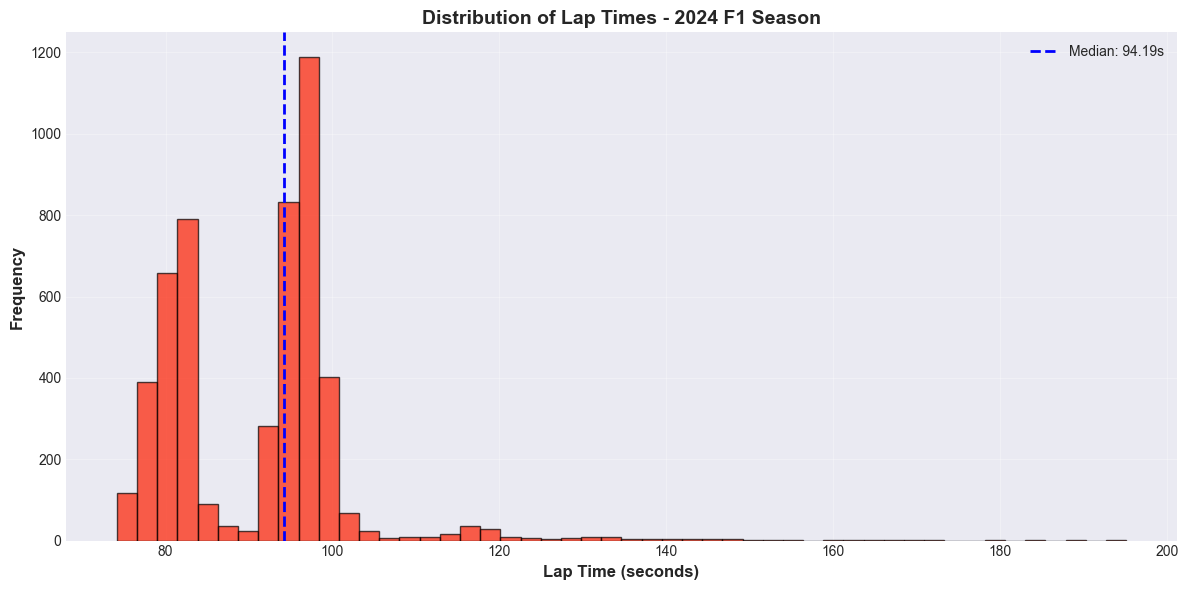

This histogram shows the distribution of lap times across all races analyzed.
The median lap time is indicated by the blue dashed line, revealing typical race pace.


In [17]:
# Visualization 1: Lap Time Distribution
plt.figure(figsize=(12, 6))
plt.hist(df_clean['LapTimeSeconds'], bins=50, color='#FF1E00', alpha=0.7, edgecolor='black')
plt.xlabel('Lap Time (seconds)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Lap Times - 2024 F1 Season', fontsize=14, fontweight='bold')
plt.axvline(df_clean['LapTimeSeconds'].median(), color='blue', linestyle='--', 
            linewidth=2, label=f'Median: {df_clean["LapTimeSeconds"].median():.2f}s')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('viz1_laptime_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("This histogram shows the distribution of lap times across all races analyzed.")
print("The median lap time is indicated by the blue dashed line, revealing typical race pace.")

### Visualization 2: Average Lap Times by Race

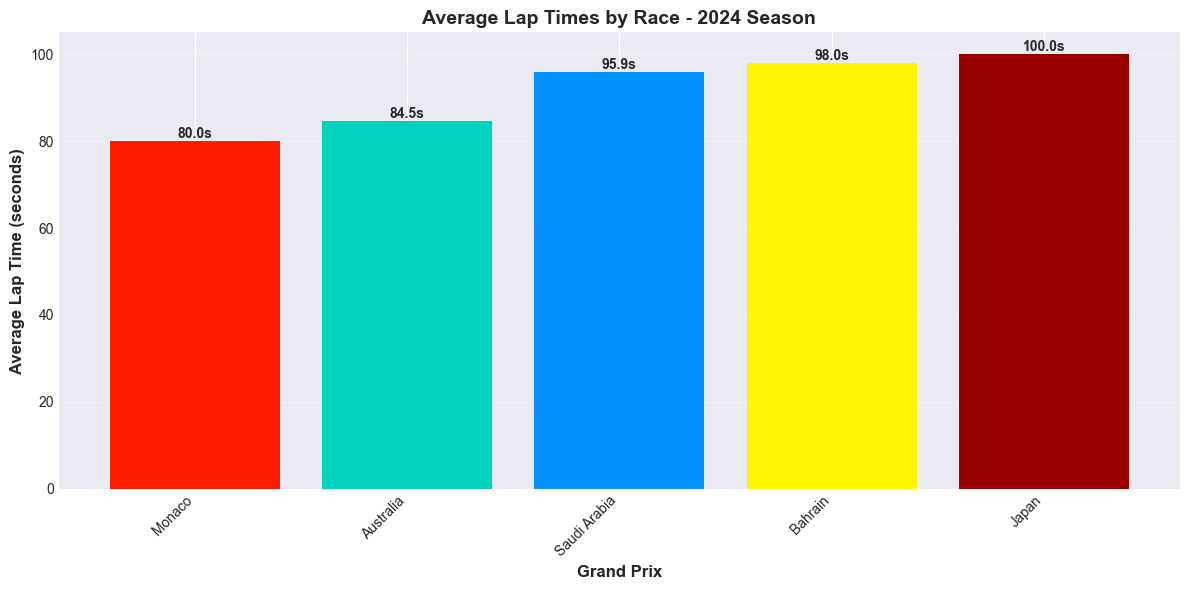

This bar chart compares average lap times across different Grand Prix circuits.
Circuit characteristics like length and corner complexity significantly affect lap times.


In [18]:
# Visualization 2: Average lap times by race
race_avg = df_clean.groupby('RaceName')['LapTimeSeconds'].mean().sort_values()

plt.figure(figsize=(12, 6))
bars = plt.bar(race_avg.index, race_avg.values, color=['#FF1E00', '#00D2BE', '#0090FF', '#FFF500', '#9B0000'])
plt.xlabel('Grand Prix', fontsize=12, fontweight='bold')
plt.ylabel('Average Lap Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Average Lap Times by Race - 2024 Season', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}s',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('viz2_avg_laptime_by_race.png', dpi=300, bbox_inches='tight')
plt.show()

print("This bar chart compares average lap times across different Grand Prix circuits.")
print("Circuit characteristics like length and corner complexity significantly affect lap times.")

### Visualization 3: Top 10 Drivers by Average Lap Time

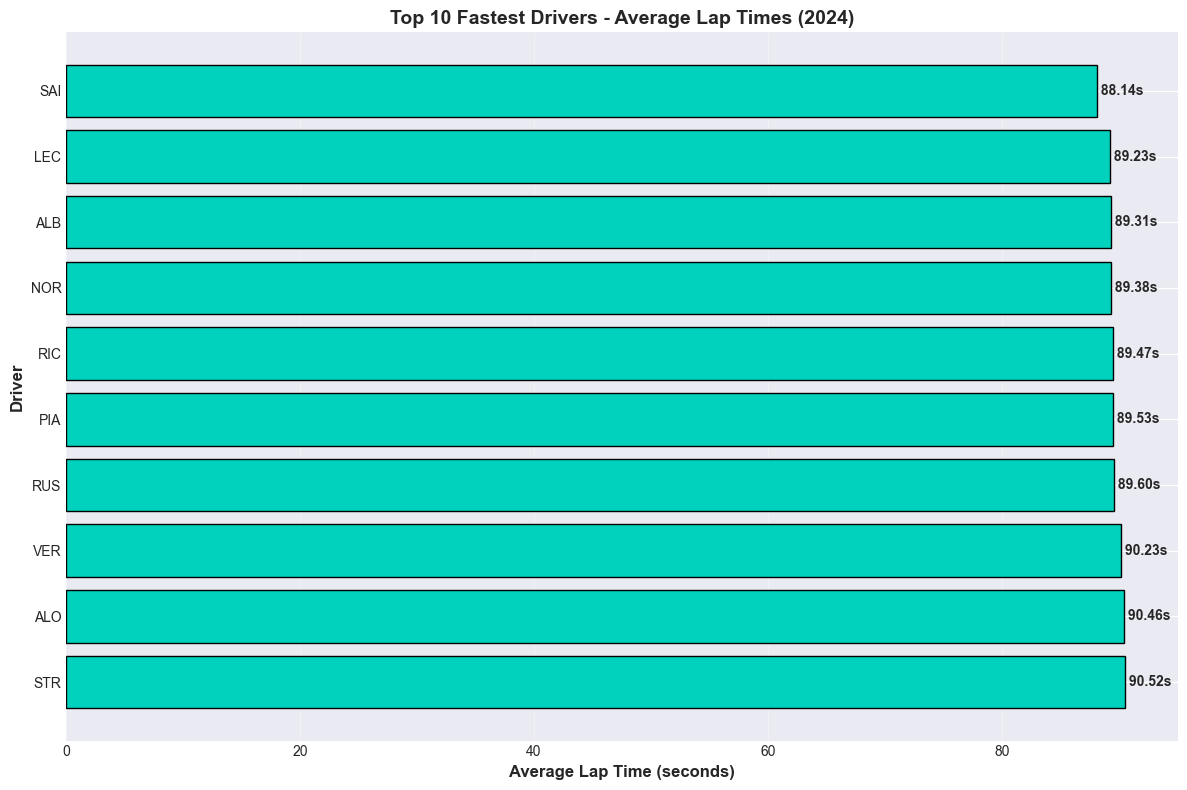

This horizontal bar chart shows the ten drivers with the fastest average lap times.
Driver performance is influenced by both car competitiveness and individual skill.


In [19]:
# Visualization 3: Top 10 drivers by average lap time
driver_avg = df_clean.groupby('Driver')['LapTimeSeconds'].mean().sort_values().head(10)

plt.figure(figsize=(12, 8))
plt.barh(driver_avg.index, driver_avg.values, color='#00D2BE', edgecolor='black')
plt.xlabel('Average Lap Time (seconds)', fontsize=12, fontweight='bold')
plt.ylabel('Driver', fontsize=12, fontweight='bold')
plt.title('Top 10 Fastest Drivers - Average Lap Times (2024)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(driver_avg.values):
    plt.text(v, i, f' {v:.2f}s', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('viz3_top10_drivers.png', dpi=300, bbox_inches='tight')
plt.show()

print("This horizontal bar chart shows the ten drivers with the fastest average lap times.")
print("Driver performance is influenced by both car competitiveness and individual skill.")

### Visualization 4: Tire Compound Performance Comparison

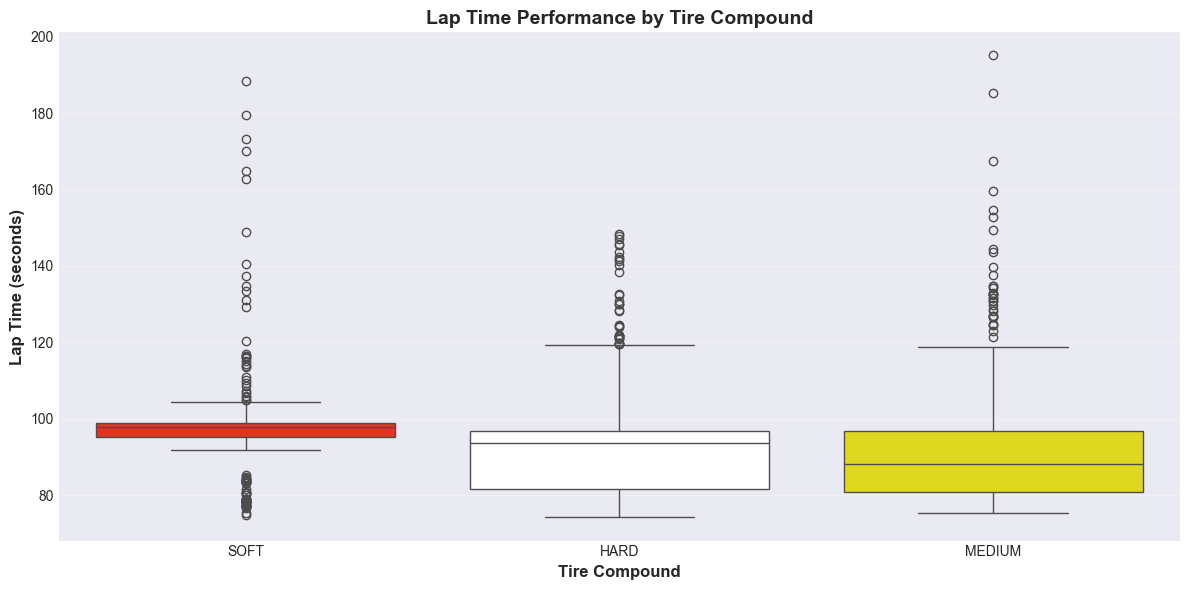

This box plot illustrates lap time distributions across different tire compounds.
Softer compounds generally provide better grip but degrade faster, affecting race strategy.


In [20]:
# Visualization 4: Tire compound performance
if 'CompoundCategory' in df_clean.columns:
    compound_data = df_clean[df_clean['CompoundCategory'] != 'UNKNOWN'].copy()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=compound_data, x='CompoundCategory', y='LapTimeSeconds', 
                palette={'SOFT': '#FF1E00', 'MEDIUM': '#FFF500', 'HARD': '#FFFFFF'})
    plt.xlabel('Tire Compound', fontsize=12, fontweight='bold')
    plt.ylabel('Lap Time (seconds)', fontsize=12, fontweight='bold')
    plt.title('Lap Time Performance by Tire Compound', fontsize=14, fontweight='bold')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('viz4_tire_compound_performance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("This box plot illustrates lap time distributions across different tire compounds.")
    print("Softer compounds generally provide better grip but degrade faster, affecting race strategy.")

### Visualization 5: Lap Time Degradation Over Tire Life

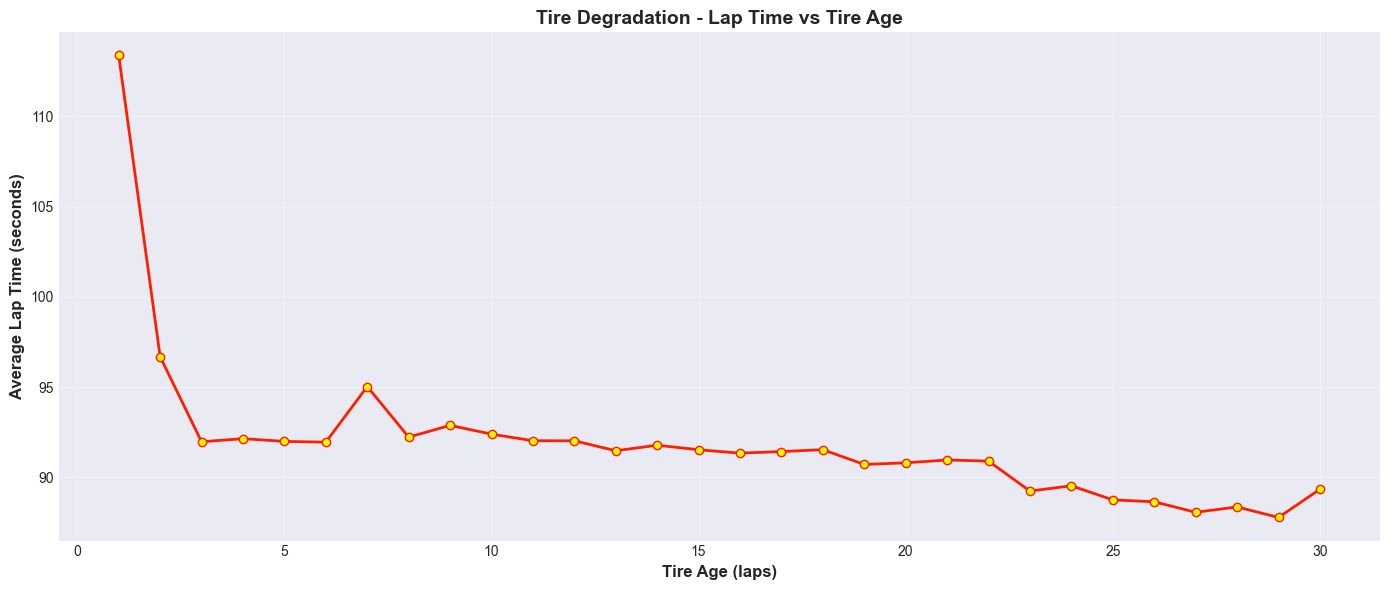

This line graph demonstrates how lap times increase as tires age and degrade.
The upward trend shows the performance loss over a tire stint, crucial for pit stop strategy.


In [21]:
# Visualization 5: Tire degradation analysis
tire_deg = df_clean[df_clean['TyreAge'] <= 30].groupby('TyreAge')['LapTimeSeconds'].mean()

plt.figure(figsize=(14, 6))
plt.plot(tire_deg.index, tire_deg.values, marker='o', linewidth=2, 
         markersize=6, color='#FF1E00', markerfacecolor='#FFF500')
plt.xlabel('Tire Age (laps)', fontsize=12, fontweight='bold')
plt.ylabel('Average Lap Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Tire Degradation - Lap Time vs Tire Age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('viz5_tire_degradation.png', dpi=300, bbox_inches='tight')
plt.show()

print("This line graph demonstrates how lap times increase as tires age and degrade.")
print("The upward trend shows the performance loss over a tire stint, crucial for pit stop strategy.")

### Visualization 6: Race Phase Performance (Early vs Mid vs Late)

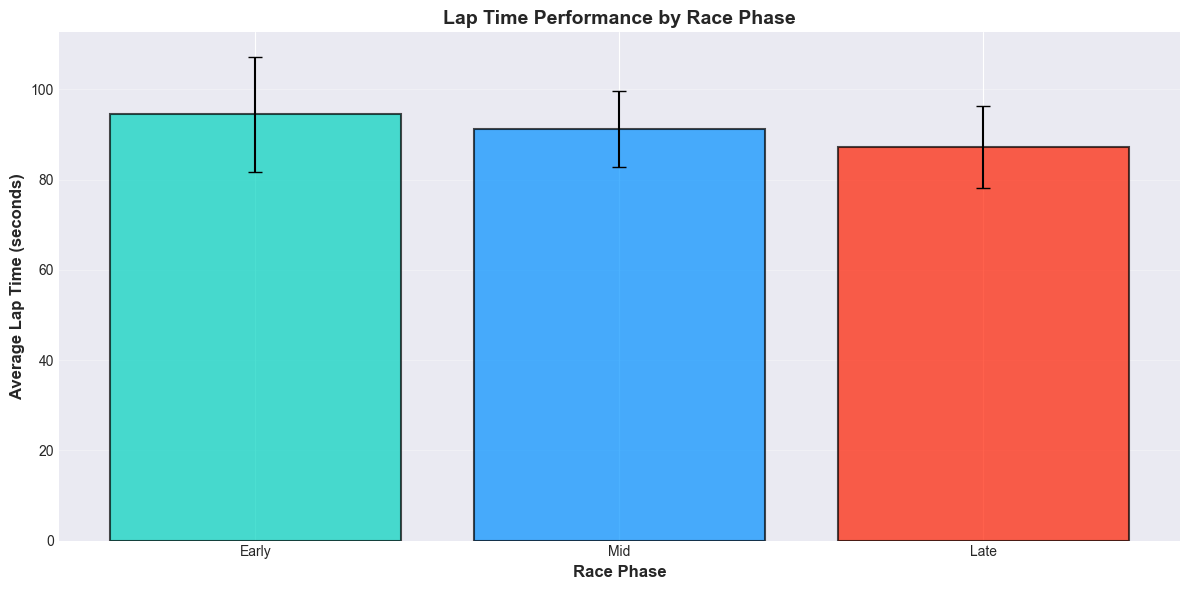

This bar chart with error bars shows average lap times during early, mid, and late race phases.
Variations reveal how fuel load, tire strategy, and race conditions evolve throughout the Grand Prix.


In [22]:
# Visualization 6: Race phase analysis
phase_data = df_clean.groupby('LapPhase')['LapTimeSeconds'].agg(['mean', 'std'])

fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(phase_data.index))
ax.bar(x, phase_data['mean'], yerr=phase_data['std'], 
       color=['#00D2BE', '#0090FF', '#FF1E00'], 
       alpha=0.7, capsize=5, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Race Phase', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Lap Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Lap Time Performance by Race Phase', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(phase_data.index)
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('viz6_race_phase_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("This bar chart with error bars shows average lap times during early, mid, and late race phases.")
print("Variations reveal how fuel load, tire strategy, and race conditions evolve throughout the Grand Prix.")

### Visualization 7: Speed Trap Analysis

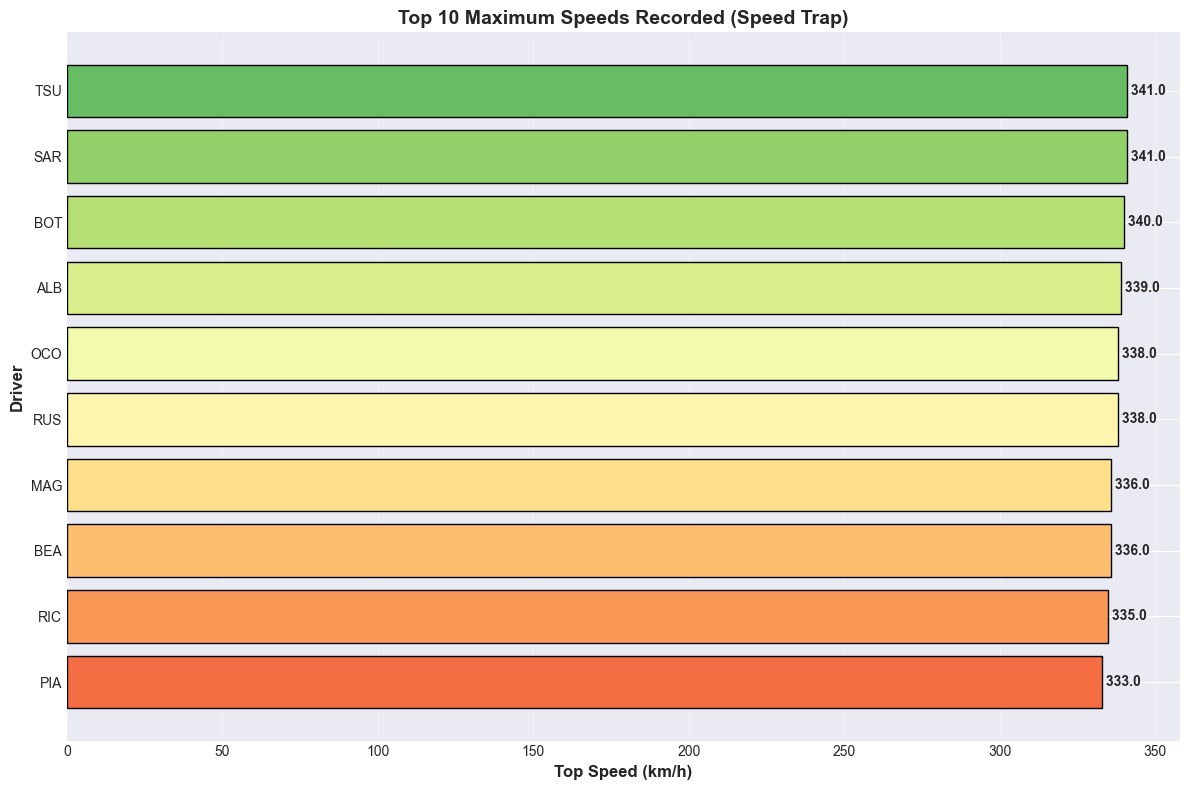

This chart displays the maximum speeds achieved by the top ten drivers at speed trap locations.
Speed trap data reflects straight-line performance, engine power, and aerodynamic efficiency.


In [23]:
# Visualization 7: Speed trap comparison
if 'SpeedST' in df_clean.columns:
    speed_data = df_clean[df_clean['SpeedST'].notna()]
    top_speeds = speed_data.groupby('Driver')['SpeedST'].max().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_speeds)))
    plt.barh(top_speeds.index, top_speeds.values, color=colors, edgecolor='black')
    plt.xlabel('Top Speed (km/h)', fontsize=12, fontweight='bold')
    plt.ylabel('Driver', fontsize=12, fontweight='bold')
    plt.title('Top 10 Maximum Speeds Recorded (Speed Trap)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x', alpha=0.3)
    
    for i, v in enumerate(top_speeds.values):
        plt.text(v, i, f' {v:.1f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('viz7_top_speeds.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("This chart displays the maximum speeds achieved by the top ten drivers at speed trap locations.")
    print("Speed trap data reflects straight-line performance, engine power, and aerodynamic efficiency.")

### Visualization 8: Correlation Heatmap of Numerical Variables

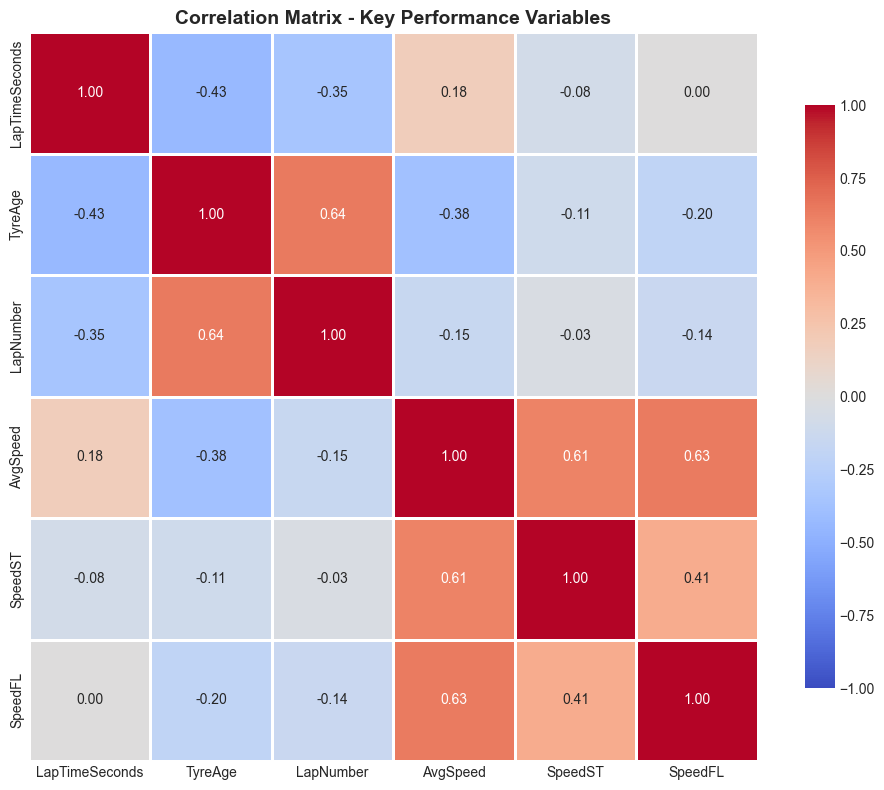

This heatmap reveals correlations between key performance metrics.
Strong correlations indicate relationships that may be useful for predictive modeling.


In [24]:
# Visualization 8: Correlation heatmap
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
# Select key variables for correlation
key_vars = ['LapTimeSeconds', 'TyreAge', 'LapNumber', 'AvgSpeed']
if 'SpeedST' in numerical_cols:
    key_vars.append('SpeedST')
if 'SpeedFL' in numerical_cols:
    key_vars.append('SpeedFL')

correlation_data = df_clean[key_vars].dropna()
corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Key Performance Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('viz8_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("This heatmap reveals correlations between key performance metrics.")
print("Strong correlations indicate relationships that may be useful for predictive modeling.")

### Visualization 9: Lap Count Distribution by Driver

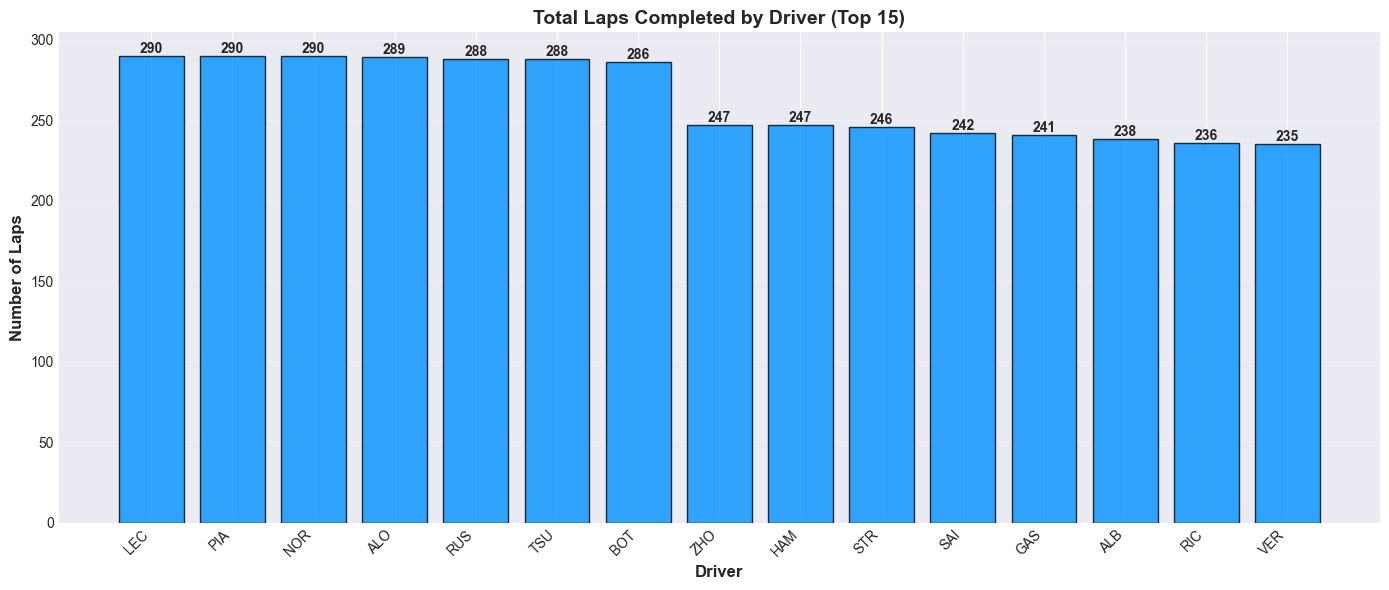

This bar chart shows the total number of laps completed by each driver in the analyzed races.
Differences in lap counts may indicate reliability issues, accidents, or race retirements.


In [25]:
# Visualization 9: Lap count by driver
lap_counts = df_clean['Driver'].value_counts().head(15)

plt.figure(figsize=(14, 6))
plt.bar(lap_counts.index, lap_counts.values, color='#0090FF', edgecolor='black', alpha=0.8)
plt.xlabel('Driver', fontsize=12, fontweight='bold')
plt.ylabel('Number of Laps', fontsize=12, fontweight='bold')
plt.title('Total Laps Completed by Driver (Top 15)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)

for i, v in enumerate(lap_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('viz9_lap_counts.png', dpi=300, bbox_inches='tight')
plt.show()

print("This bar chart shows the total number of laps completed by each driver in the analyzed races.")
print("Differences in lap counts may indicate reliability issues, accidents, or race retirements.")

### Visualization 10: Lap Time Consistency (Standard Deviation by Driver)

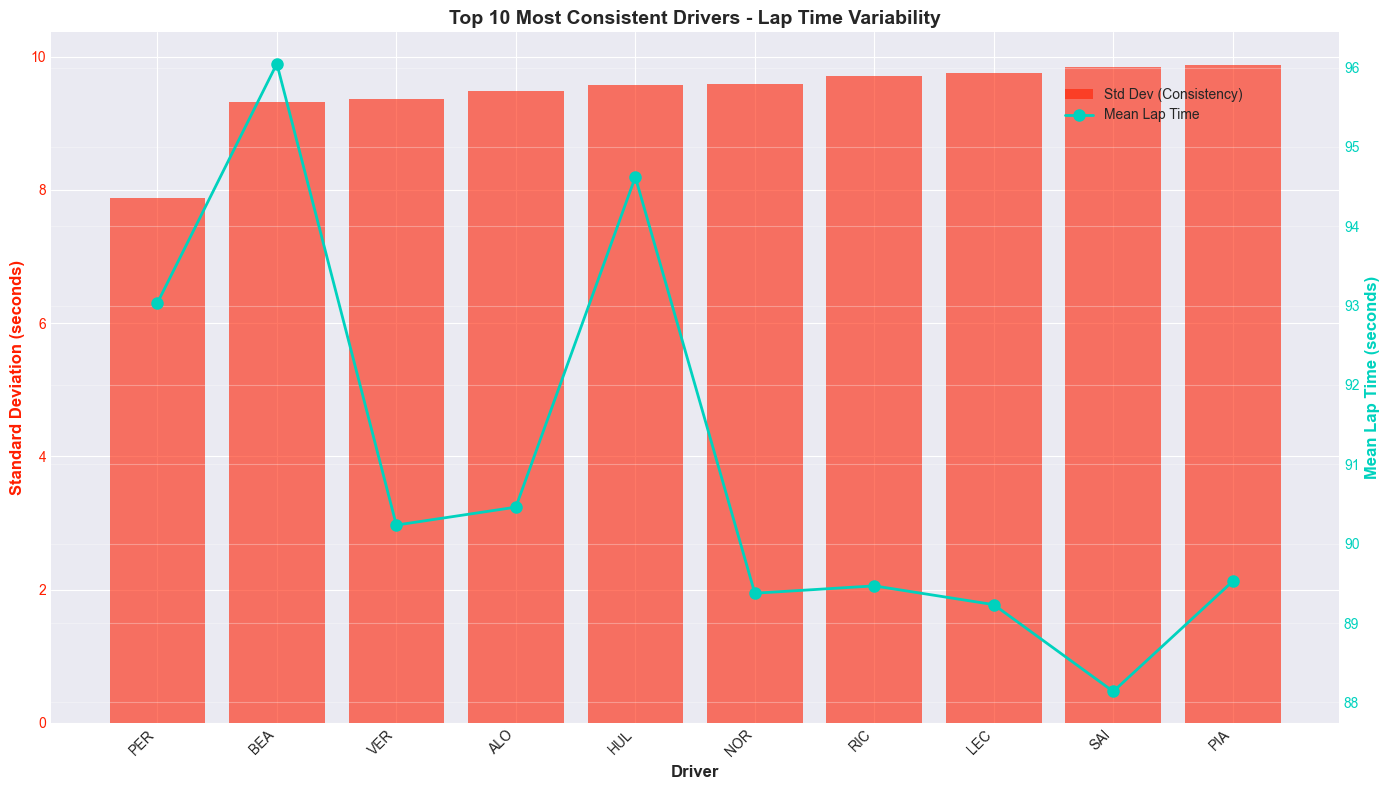

This dual-axis chart compares driver consistency (lower std dev = more consistent) with average pace.
Consistent lap times indicate predictable performance, valuable for race strategy and tire management.


In [26]:
# Visualization 10: Lap time consistency
driver_consistency = df_clean.groupby('Driver')['LapTimeSeconds'].agg(['mean', 'std']).sort_values('std').head(10)

fig, ax1 = plt.subplots(figsize=(14, 8))

x = range(len(driver_consistency.index))
ax1.bar(x, driver_consistency['std'], color='#FF1E00', alpha=0.6, label='Std Dev (Consistency)')
ax1.set_xlabel('Driver', fontsize=12, fontweight='bold')
ax1.set_ylabel('Standard Deviation (seconds)', fontsize=12, fontweight='bold', color='#FF1E00')
ax1.tick_params(axis='y', labelcolor='#FF1E00')
ax1.set_xticks(x)
ax1.set_xticklabels(driver_consistency.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(x, driver_consistency['mean'], color='#00D2BE', marker='o', 
         linewidth=2, markersize=8, label='Mean Lap Time')
ax2.set_ylabel('Mean Lap Time (seconds)', fontsize=12, fontweight='bold', color='#00D2BE')
ax2.tick_params(axis='y', labelcolor='#00D2BE')

plt.title('Top 10 Most Consistent Drivers - Lap Time Variability', fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('viz10_driver_consistency.png', dpi=300, bbox_inches='tight')
plt.show()

print("This dual-axis chart compares driver consistency (lower std dev = more consistent) with average pace.")
print("Consistent lap times indicate predictable performance, valuable for race strategy and tire management.")

### Visualization 11: Sector Time Comparison (if available)

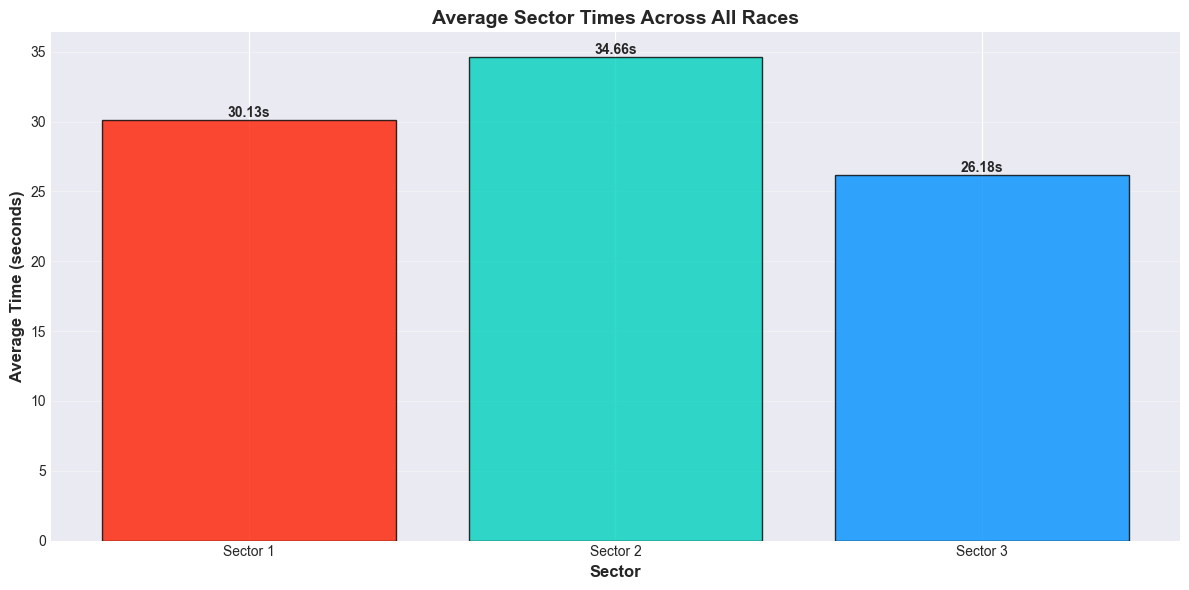

This chart compares average times across the three sectors of race circuits.
Sector analysis helps identify where drivers and teams excel or struggle on track.


In [27]:
# Visualization 11: Sector performance
if all(col in df_clean.columns for col in ['Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds']):
    sector_data = df_clean[['Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds']].dropna()
    
    plt.figure(figsize=(12, 6))
    sector_means = sector_data.mean()
    sectors = ['Sector 1', 'Sector 2', 'Sector 3']
    colors = ['#FF1E00', '#00D2BE', '#0090FF']
    
    plt.bar(sectors, sector_means.values, color=colors, edgecolor='black', alpha=0.8)
    plt.xlabel('Sector', fontsize=12, fontweight='bold')
    plt.ylabel('Average Time (seconds)', fontsize=12, fontweight='bold')
    plt.title('Average Sector Times Across All Races', fontsize=14, fontweight='bold')
    plt.grid(True, axis='y', alpha=0.3)
    
    for i, v in enumerate(sector_means.values):
        plt.text(i, v, f'{v:.2f}s', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('viz11_sector_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("This chart compares average times across the three sectors of race circuits.")
    print("Sector analysis helps identify where drivers and teams excel or struggle on track.")

### Visualization 12: Race Position Changes Over Laps (Sample Race)

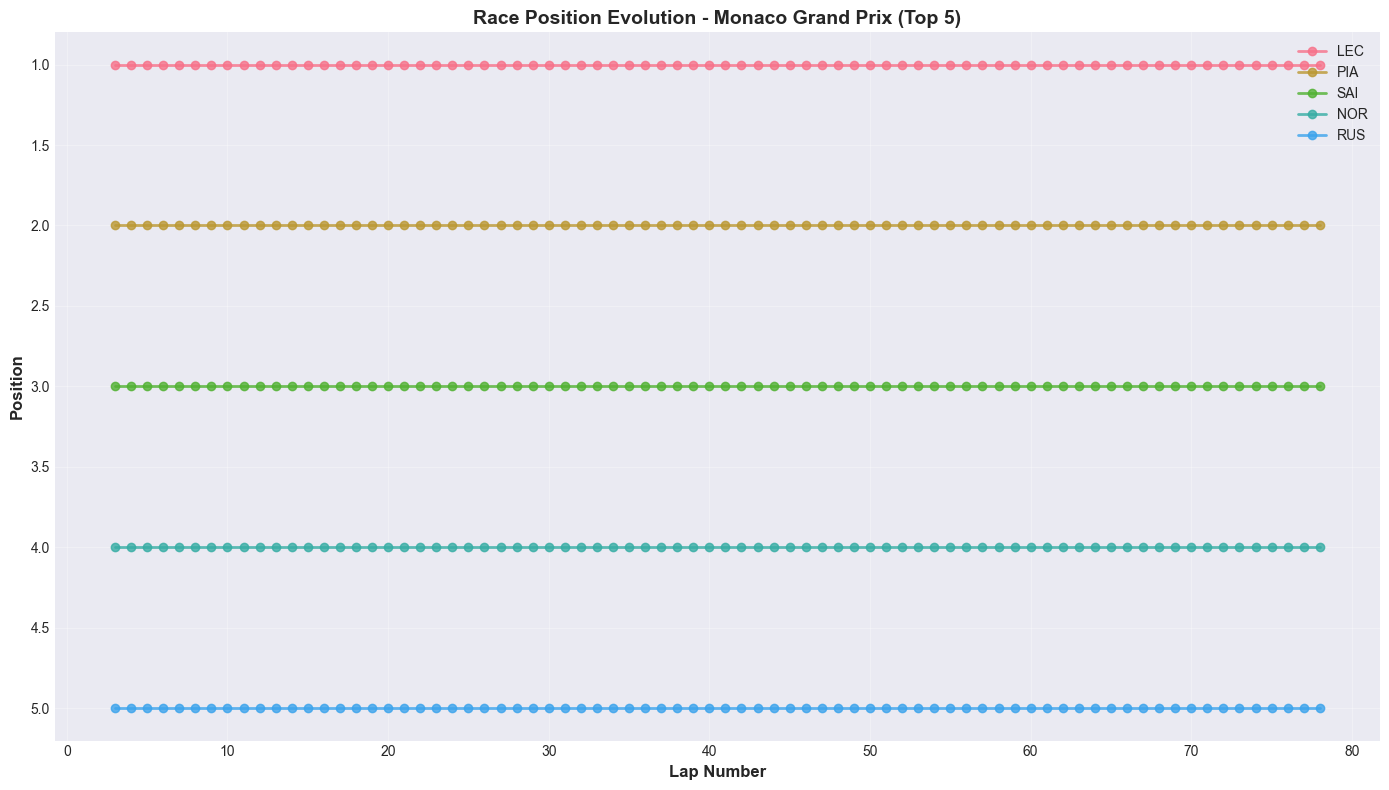

This line graph tracks how the top five finishers' positions changed throughout the Monaco Grand Prix.
Position changes reveal overtaking opportunities, pit stop strategies, and race incidents.


In [28]:
# Visualization 12: Position changes over race distance
if 'Position' in df_clean.columns:
    # Pick one race for detailed position analysis
    sample_race = df_clean['RaceName'].value_counts().index[0]
    race_positions = df_clean[df_clean['RaceName'] == sample_race]
    
    # Get top 5 drivers by final position
    top_drivers = race_positions.groupby('Driver')['Position'].last().sort_values().head(5).index
    
    plt.figure(figsize=(14, 8))
    for driver in top_drivers:
        driver_data = race_positions[race_positions['Driver'] == driver].sort_values('LapNumber')
        plt.plot(driver_data['LapNumber'], driver_data['Position'], 
                marker='o', linewidth=2, label=driver, alpha=0.8)
    
    plt.xlabel('Lap Number', fontsize=12, fontweight='bold')
    plt.ylabel('Position', fontsize=12, fontweight='bold')
    plt.title(f'Race Position Evolution - {sample_race} Grand Prix (Top 5)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('viz12_position_changes.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"This line graph tracks how the top five finishers' positions changed throughout the {sample_race} Grand Prix.")
    print("Position changes reveal overtaking opportunities, pit stop strategies, and race incidents.")

## 5. Summary Statistics

In [38]:
# Generate comprehensive summary statistics
print("SUMMARY STATISTICS - CLEANED DATA")
print(f"\nTotal Races Analyzed: {df_clean['RaceName'].nunique()}")
print(f"Total Drivers: {df_clean['Driver'].nunique()}")
print(f"Total Laps: {len(df_clean)}")
print(f"\nAverage Lap Time: {df_clean['LapTimeSeconds'].mean():.2f} seconds")
print(f"Median Lap Time: {df_clean['LapTimeSeconds'].median():.2f} seconds")
print(f"Fastest Lap: {df_clean['LapTimeSeconds'].min():.2f} seconds")
print(f"Slowest Lap (cleaned): {df_clean['LapTimeSeconds'].max():.2f} seconds")




SUMMARY STATISTICS - CLEANED DATA

Total Races Analyzed: 5
Total Drivers: 21
Total Laps: 5081

Average Lap Time: 91.07 seconds
Median Lap Time: 94.19 seconds
Fastest Lap: 74.17 seconds
Slowest Lap (cleaned): 195.12 seconds


## 6. Data Export for Future Analysis

### 6.1 Create Subsets for Specific Models

In [30]:
# Create specific datasets for different analysis methods

# For PCA/Clustering - numerical features only
numerical_features = ['LapTimeSeconds', 'TyreAge', 'LapNumber', 'AvgSpeed']
if 'SpeedST' in df_clean.columns:
    numerical_features.append('SpeedST')
if 'SpeedFL' in df_clean.columns:
    numerical_features.append('SpeedFL')

df_numerical = df_clean[numerical_features].dropna()
df_numerical.to_csv('f1_data_numerical.csv', index=False)
print(f"Numerical dataset saved: {df_numerical.shape}")

# For classification - with categorical labels
if 'CompoundCategory' in df_clean.columns:
    df_classification = df_clean[df_clean['CompoundCategory'] != 'UNKNOWN'].copy()
    df_classification.to_csv('f1_data_classification.csv', index=False)
    print(f"Classification dataset saved: {df_classification.shape}")

print("\nAll datasets prepared for Module 2+ analyses!")

Numerical dataset saved: (5080, 6)
Classification dataset saved: (5081, 42)

All datasets prepared for Module 2+ analyses!


## 7. Next Steps


### API Information:
- **API Used:** FastF1 (https://github.com/theOehrly/Fast-F1)
- **Data Source:** Official F1 Live Timing Service

